# Airline Passenger Satisfaction: Data Pre-processing & EDA
Using data from Kaggle, the goal of this project is to create customer segments based on airline customer reviews as well as a classifier classifying records of customer reviews detailing their satisfaction of their flight experience. In this notebook, I will preprocess the passenger satisfaction data as well as perform EDA. Following this notebook, I will work on clustering and classification tasks on the data.

In [128]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)

import os
import warnings
warnings.filterwarnings('ignore')



In [2]:
#PATH = "/kaggle/input/airline-passenger-satisfaction/"
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
train_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
train_df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [6]:
train_df.shape

(103904, 24)

In [7]:
test_df.shape

(25976, 25)

I will keep these two dataframes separate once model building comes. 

## Missing Value Detection

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In both dataframes, only 'Arrival Delay in Minutes' contains missing values. Since these are both separate sets of data I will impute them individually.

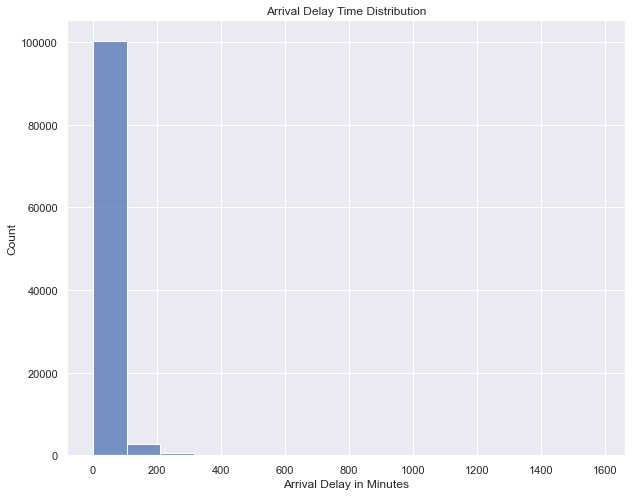

In [10]:
plt.figure(figsize=(10,8))
sns.histplot(data=train_df, x='Arrival Delay in Minutes', bins=15)
plt.title("Arrival Delay Time Distribution")
plt.show()

In [11]:
train_df['Arrival Delay in Minutes'].value_counts()

0.0       58159
1.0        2211
2.0        2064
3.0        1952
4.0        1907
5.0        1658
6.0        1616
7.0        1481
8.0        1394
9.0        1264
10.0       1181
11.0       1129
12.0       1070
13.0       1058
14.0        954
15.0        861
16.0        836
17.0        831
18.0        742
19.0        699
21.0        650
20.0        645
24.0        582
22.0        576
23.0        575
26.0        524
27.0        508
25.0        505
30.0        445
28.0        439
29.0        416
33.0        366
36.0        362
31.0        357
34.0        356
32.0        351
38.0        326
35.0        316
37.0        307
40.0        297
39.0        297
41.0        283
44.0        264
42.0        257
43.0        230
46.0        230
45.0        227
48.0        205
49.0        205
52.0        201
51.0        198
47.0        198
53.0        195
50.0        186
57.0        173
55.0        171
56.0        168
60.0        161
58.0        153
54.0        149
61.0        147
59.0        146
62.0    

In [12]:
train_df.head(15)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.0,satisfied
8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [13]:
train_df[pd.isnull(train_df['Arrival Delay in Minutes'])]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,5,5,5,5,5,2,4,1,1,5,31,NaN,satisfied
1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,4,3,4,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,2,4,3,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,2,3,2,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,5,2,5,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
2485,121173,Female,Loyal Customer,28,Personal Travel,Eco,2370,4,5,4,3,3,4,3,3,5,4,4,5,4,3,3,NaN,satisfied
2630,3638,Male,Loyal Customer,35,Business travel,Business,1534,1,1,1,1,3,5,4,5,5,5,5,5,5,5,0,NaN,satisfied
3621,48387,Male,Loyal Customer,47,Personal Travel,Eco,587,1,2,1,3,4,1,4,4,1,1,4,4,4,4,17,NaN,neutral or dissatisfied
4041,66091,Male,Loyal Customer,31,Business travel,Business,2490,1,1,1,1,4,4,4,4,3,5,5,4,4,4,6,NaN,satisfied
4490,48504,Male,disloyal Customer,30,Business travel,Eco,737,4,4,4,3,2,4,2,2,5,1,4,1,3,2,22,NaN,neutral or dissatisfied


There doesn't appaear to be any commonalities in the rows with missing values. Since the mode of the attribute far exceeds the other possible values, and given we have only a few hundred records with missing values in this column, I will impute the missing values with 0.0.

In [14]:
train_df['Arrival Delay in Minutes'].fillna(0.0, inplace=True)

In [15]:
test_df['Arrival Delay in Minutes'].fillna(0.0, inplace=True)

## EDA
Let's first plot the distributions of each of the columns. I will drop the 'id' column since it is simply an identifier.

In [16]:
train_df.drop(columns=['id'], inplace=True)

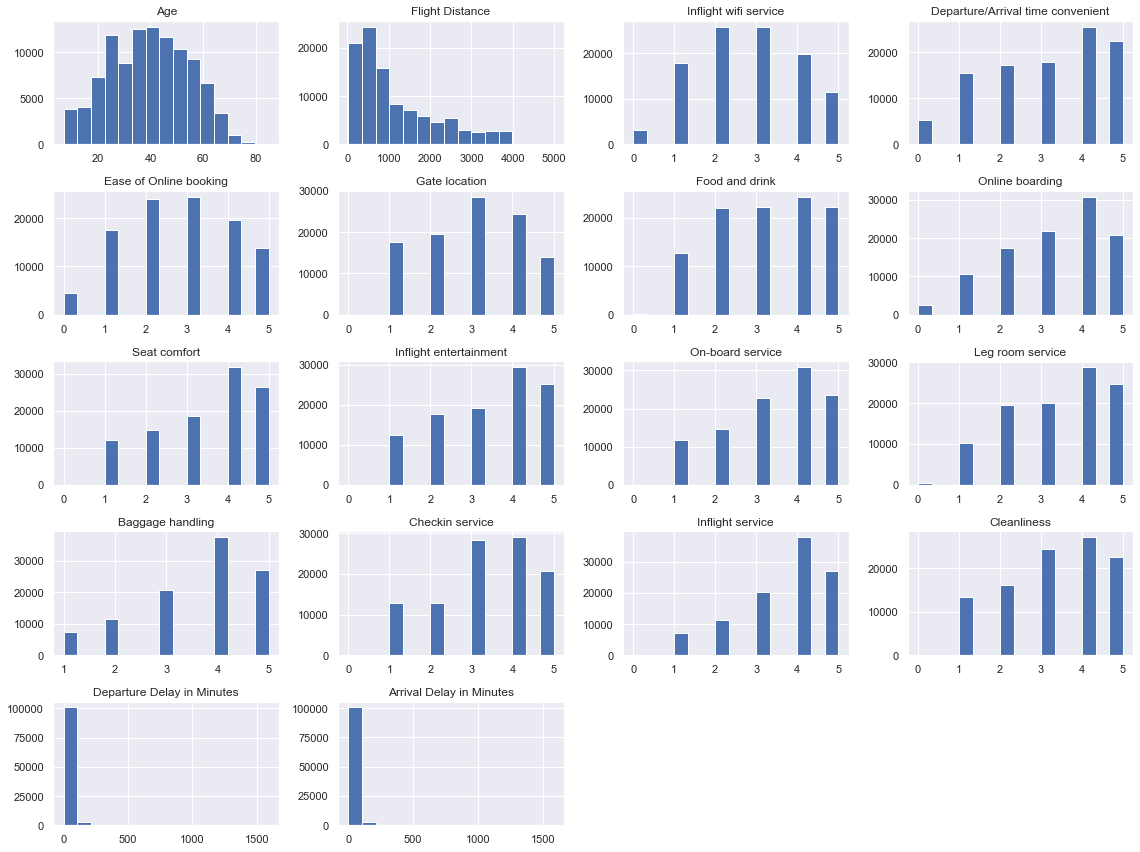

In [17]:
train_df.hist(figsize=(16, 12), bins=15)
plt.tight_layout()

We can see flight distance is positively skewed. The following columns generally have an increasing amount of records toward a positive sentiment. The last two columns primarily consist of 0's, i.e. there are no delays in the majority of these flights.

<b>Does the rating of in-flight Wifi service change as the distance of the flight increases?</b>

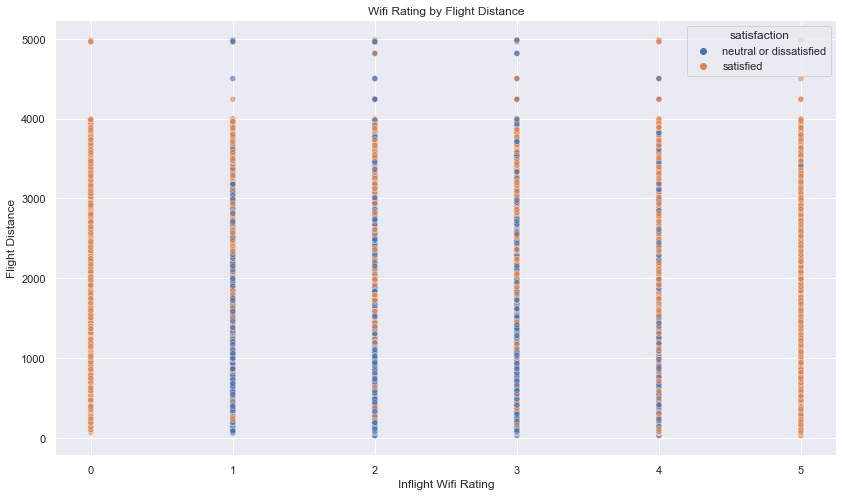

In [33]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='Inflight wifi service', y='Flight Distance', hue='satisfaction', alpha=0.6, data=train_df)
plt.xlabel('Inflight Wifi Rating')
plt.ylabel('Flight Distance')
plt.title('Wifi Rating by Flight Distance')
plt.show()

There appears to be more satisfied customers when the wifi rating is high, but it looks like the wifi quality is consistent or is subjective.

In addition, flights without flight still see a lot of satisfied customers.

<b>Are loyal customers more likely to upgrade their seats?</b>

<Figure size 1008x576 with 0 Axes>

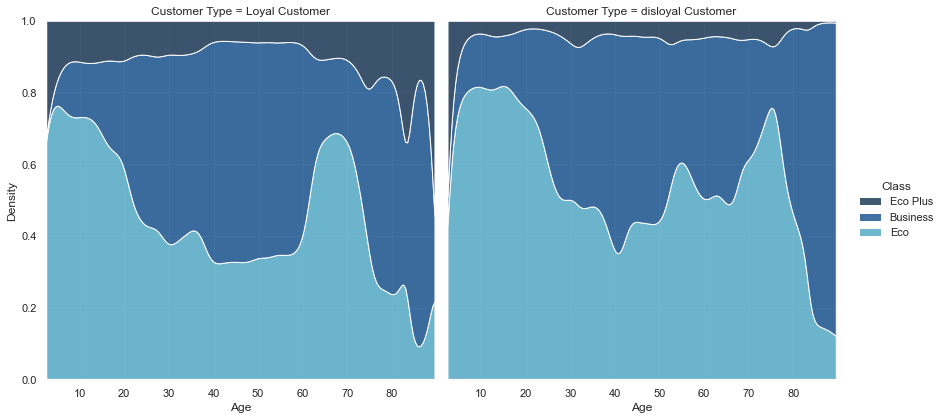

In [19]:
plt.figure(figsize=(14, 8))
sns.displot(data=train_df, x="Age", hue="Class", col='Customer Type', kind="kde", height=6,
    multiple="fill", clip=(0, None), palette="ocean")

plt.show()

It appears there isn't too much of a difference between loyal customers here for if passengers purchase different seats. We can see, however, that generally the older population is purchasing more of the ECO seats, and mostly those aged 30-50 are purchasing business class seats. Therefore, let's next take another look with <i>Type of Travel</i>.

<Figure size 1008x576 with 0 Axes>

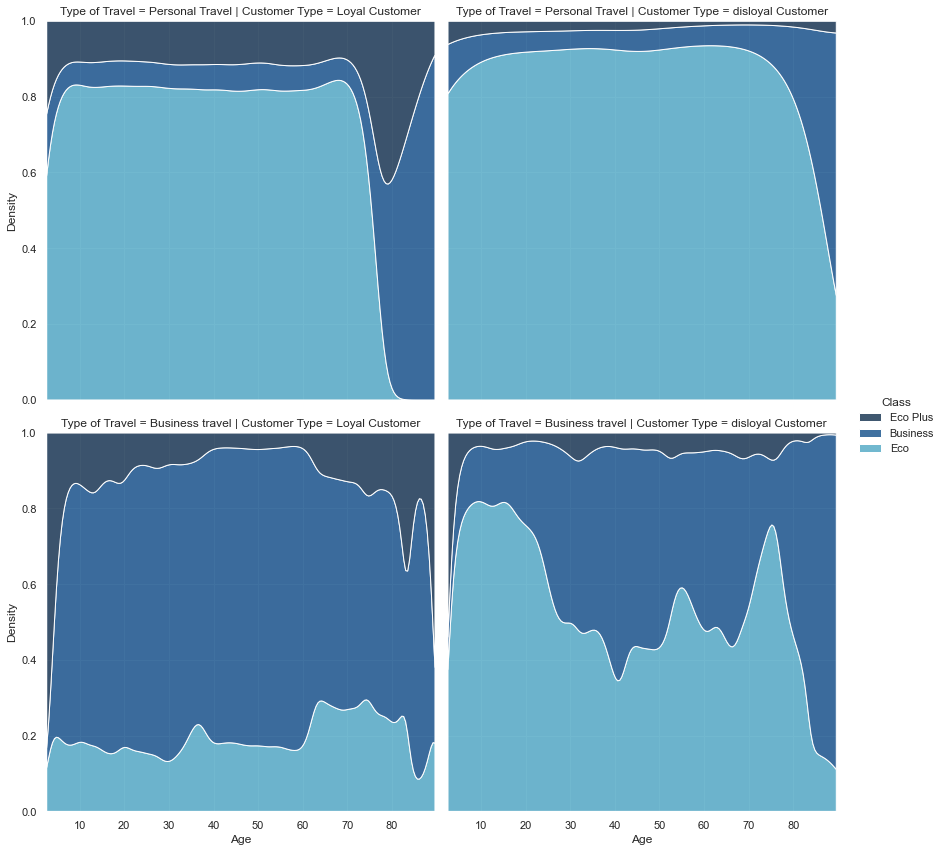

In [20]:
plt.figure(figsize=(14, 8))
sns.displot(data=train_df, x="Age", hue="Class", col='Customer Type', row='Type of Travel', kind="kde", height=6,
    multiple="fill", clip=(0, None), palette="ocean")

plt.show()

<b>How about level of satisfaction by type of travel and seat class?</b>

<Figure size 1008x576 with 0 Axes>

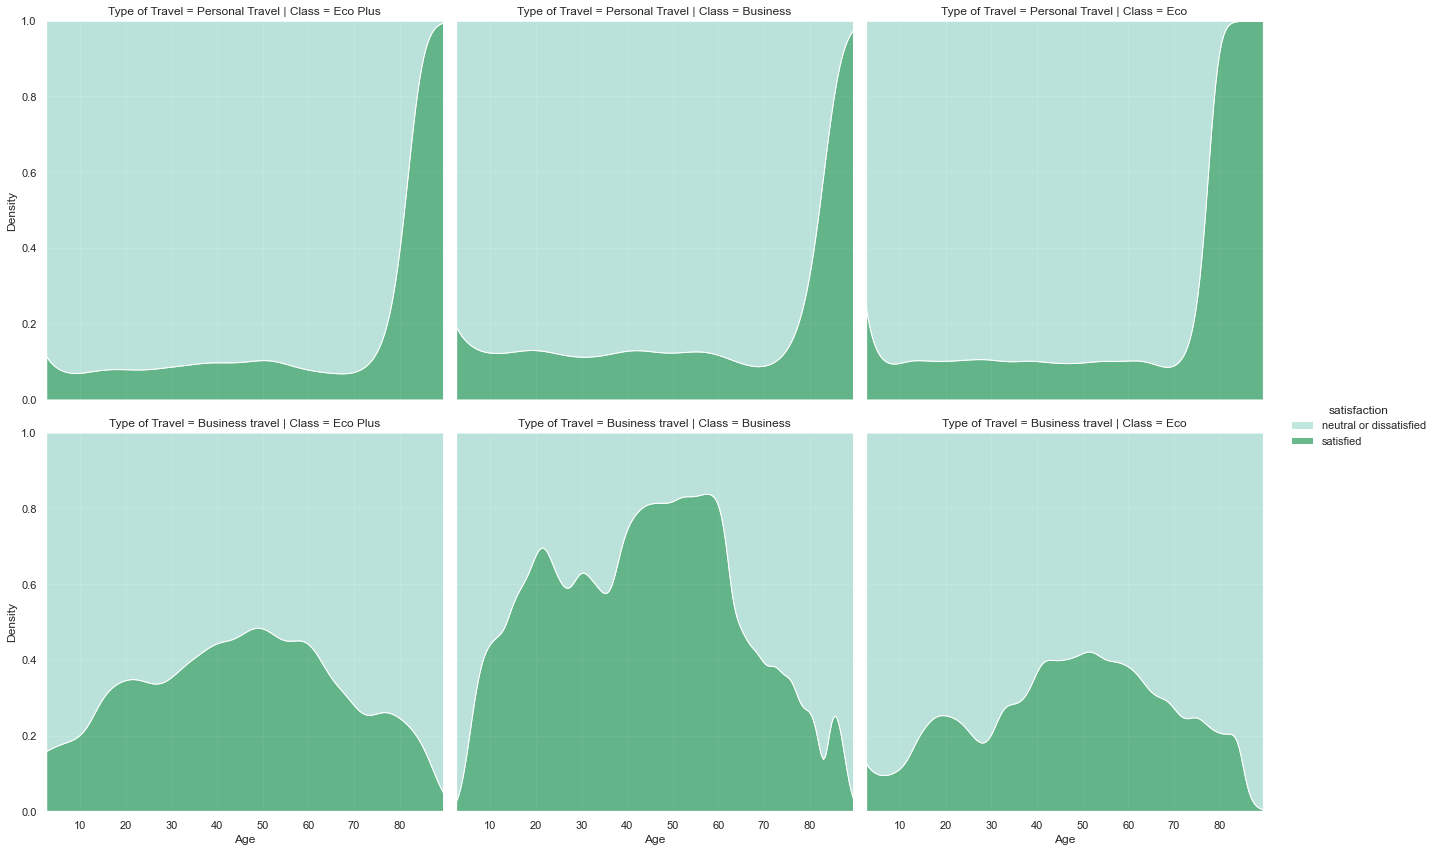

In [100]:
plt.figure(figsize=(14, 8))
sns.displot(data=train_df, x="Age", hue="satisfaction", col='Class', row='Type of Travel', kind="kde", height=6,
    multiple="fill", clip=(0, None), palette="BuGn")

plt.show()

Of course, the majority of people traveling by business will use more business class seats on flights. Not only that, the majority of those folks are <b>loyal customers</b>. Business class seats aren't as abundant for those who are disloyal.

The majority of personal travel seats are in the standard ECO class. Aside from the very elderly folks.

In the next plot detailing satisfaction, it does indeed seem elderly are more likely to rate their experience as satisfied no matter their seat class. Those traveling for business are generally more willing to be satisfied, but primarily those sitting in the business class seats do.

<b>Are there any differences with gender in flight patterns?</b>

<Figure size 1008x576 with 0 Axes>

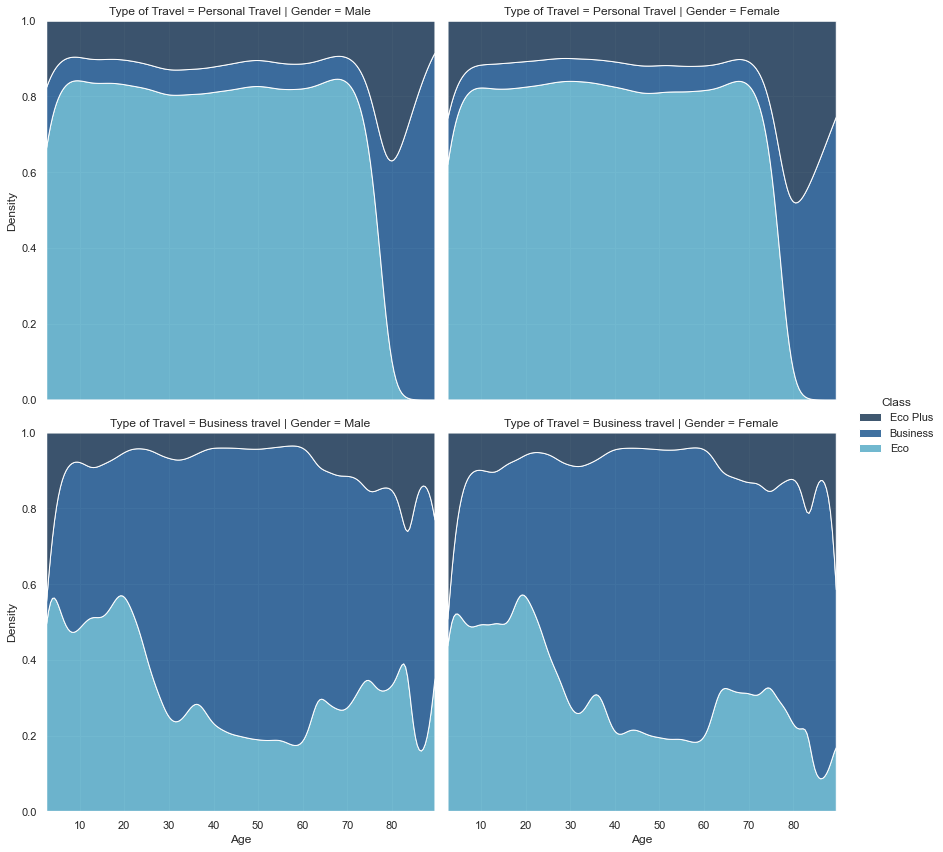

In [31]:
plt.figure(figsize=(14, 8))
sns.displot(data=train_df, x="Age", hue="Class", col='Gender', row='Type of Travel', kind="kde", height=6,
    multiple="fill", clip=(0, None), palette="ocean")

plt.show()

<Figure size 1008x576 with 0 Axes>

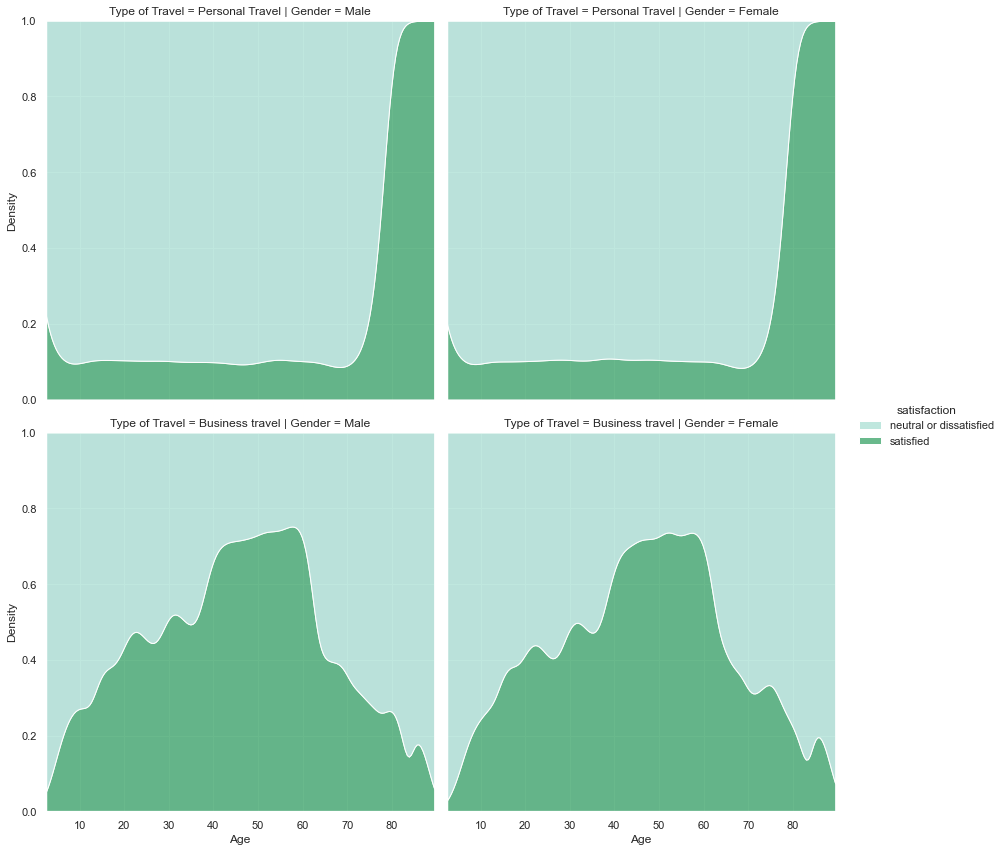

In [101]:
plt.figure(figsize=(14, 8))
sns.displot(data=train_df, x="Age", hue="satisfaction", col='Gender', row='Type of Travel', kind="kde", height=6,
    multiple="fill", clip=(0, None), palette="BuGn")

plt.show()

There is virtually no difference between genders for why a person travels. 

<b>Can we see any clear patterns of flight satisfaction with delay times?</b>

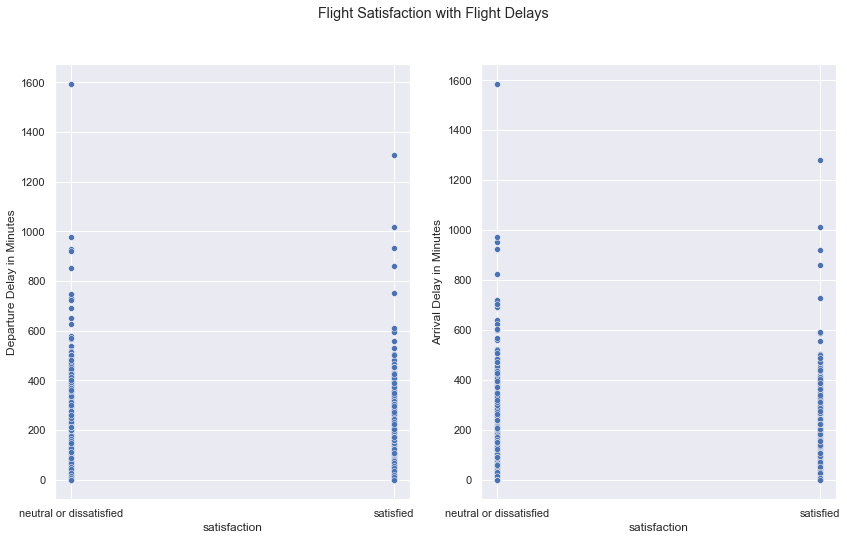

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
sns.scatterplot(x='satisfaction', y='Departure Delay in Minutes', data=train_df, ax=ax1)
sns.scatterplot(x='satisfaction', y='Arrival Delay in Minutes', data=train_df, ax=ax2)
plt.suptitle('Flight Satisfaction with Flight Delays')
plt.show()

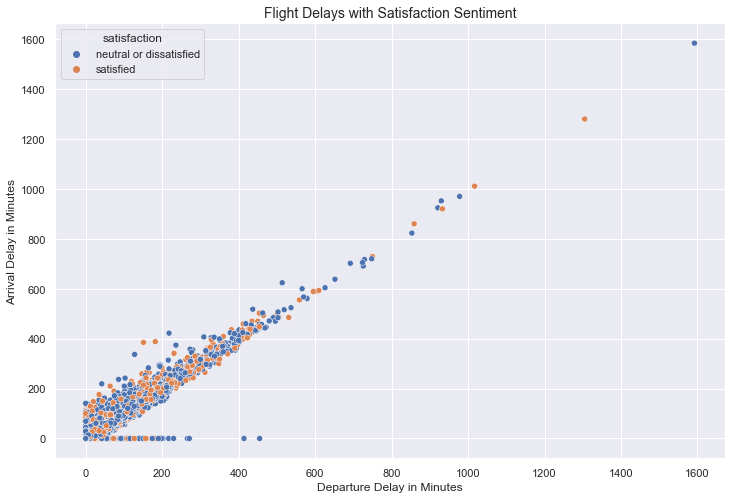

In [70]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Departure Delay in Minutes', y='Arrival Delay in Minutes', hue='satisfaction', data=train_df)
plt.title('Flight Delays with Satisfaction Sentiment', fontsize=14)
plt.show()

There are more records of dissatisfaction once the delay time spikes, however there is still representation of satisfied customers.

In the plot below, it appears with some exception to there being flights with departure but no arrival delay, these two values are intrinsically correlated. Moreover, there doesn't appear to be much separation between satisfied and dissatisfied reviews despite there being delays.

Let's next make a <b>pairplot for some of the 1-5 survey question responses.</b>

In [34]:
train_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [39]:
survey_cols = ['Ease of Online booking', 'Online boarding', 'On-board service', 'Inflight service']
survey_cols.append('satisfaction')

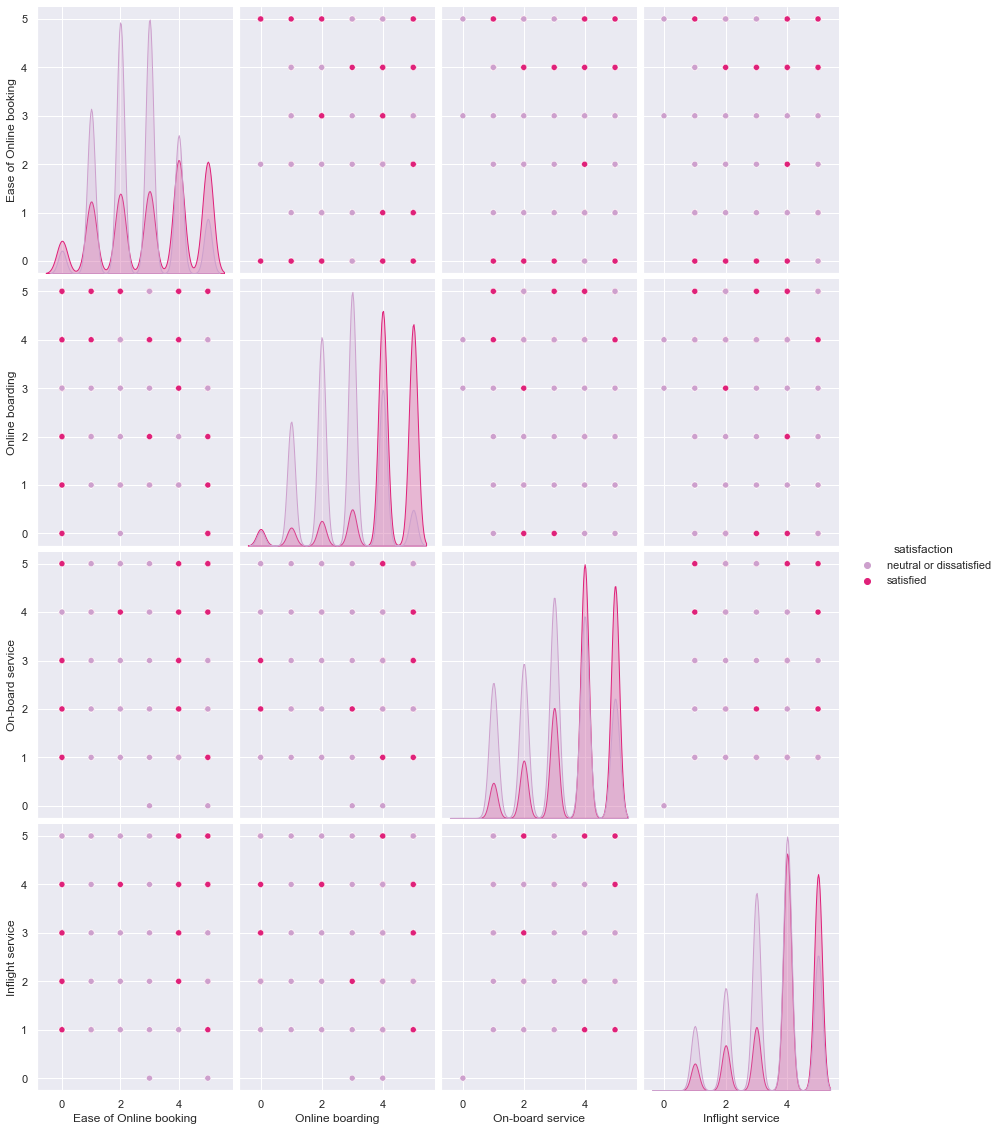

In [40]:
sns.pairplot(train_df[survey_cols], height=4, aspect=0.75, hue='satisfaction', palette='PuRd')
plt.show()

The results of a pairplot are a bit staggered. We have more dissatisfied reviews for these categories than ones that were satisfied when the survey results for these attributes are lower as expected.

<b>Are customers rating flight experiences higher when they are in upgraded seats?</b>

In [45]:
survey_cols = ['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Inflight service', 'On-board service', 'Leg room service', 'Cleanliness']
survey_cols.append('Class')

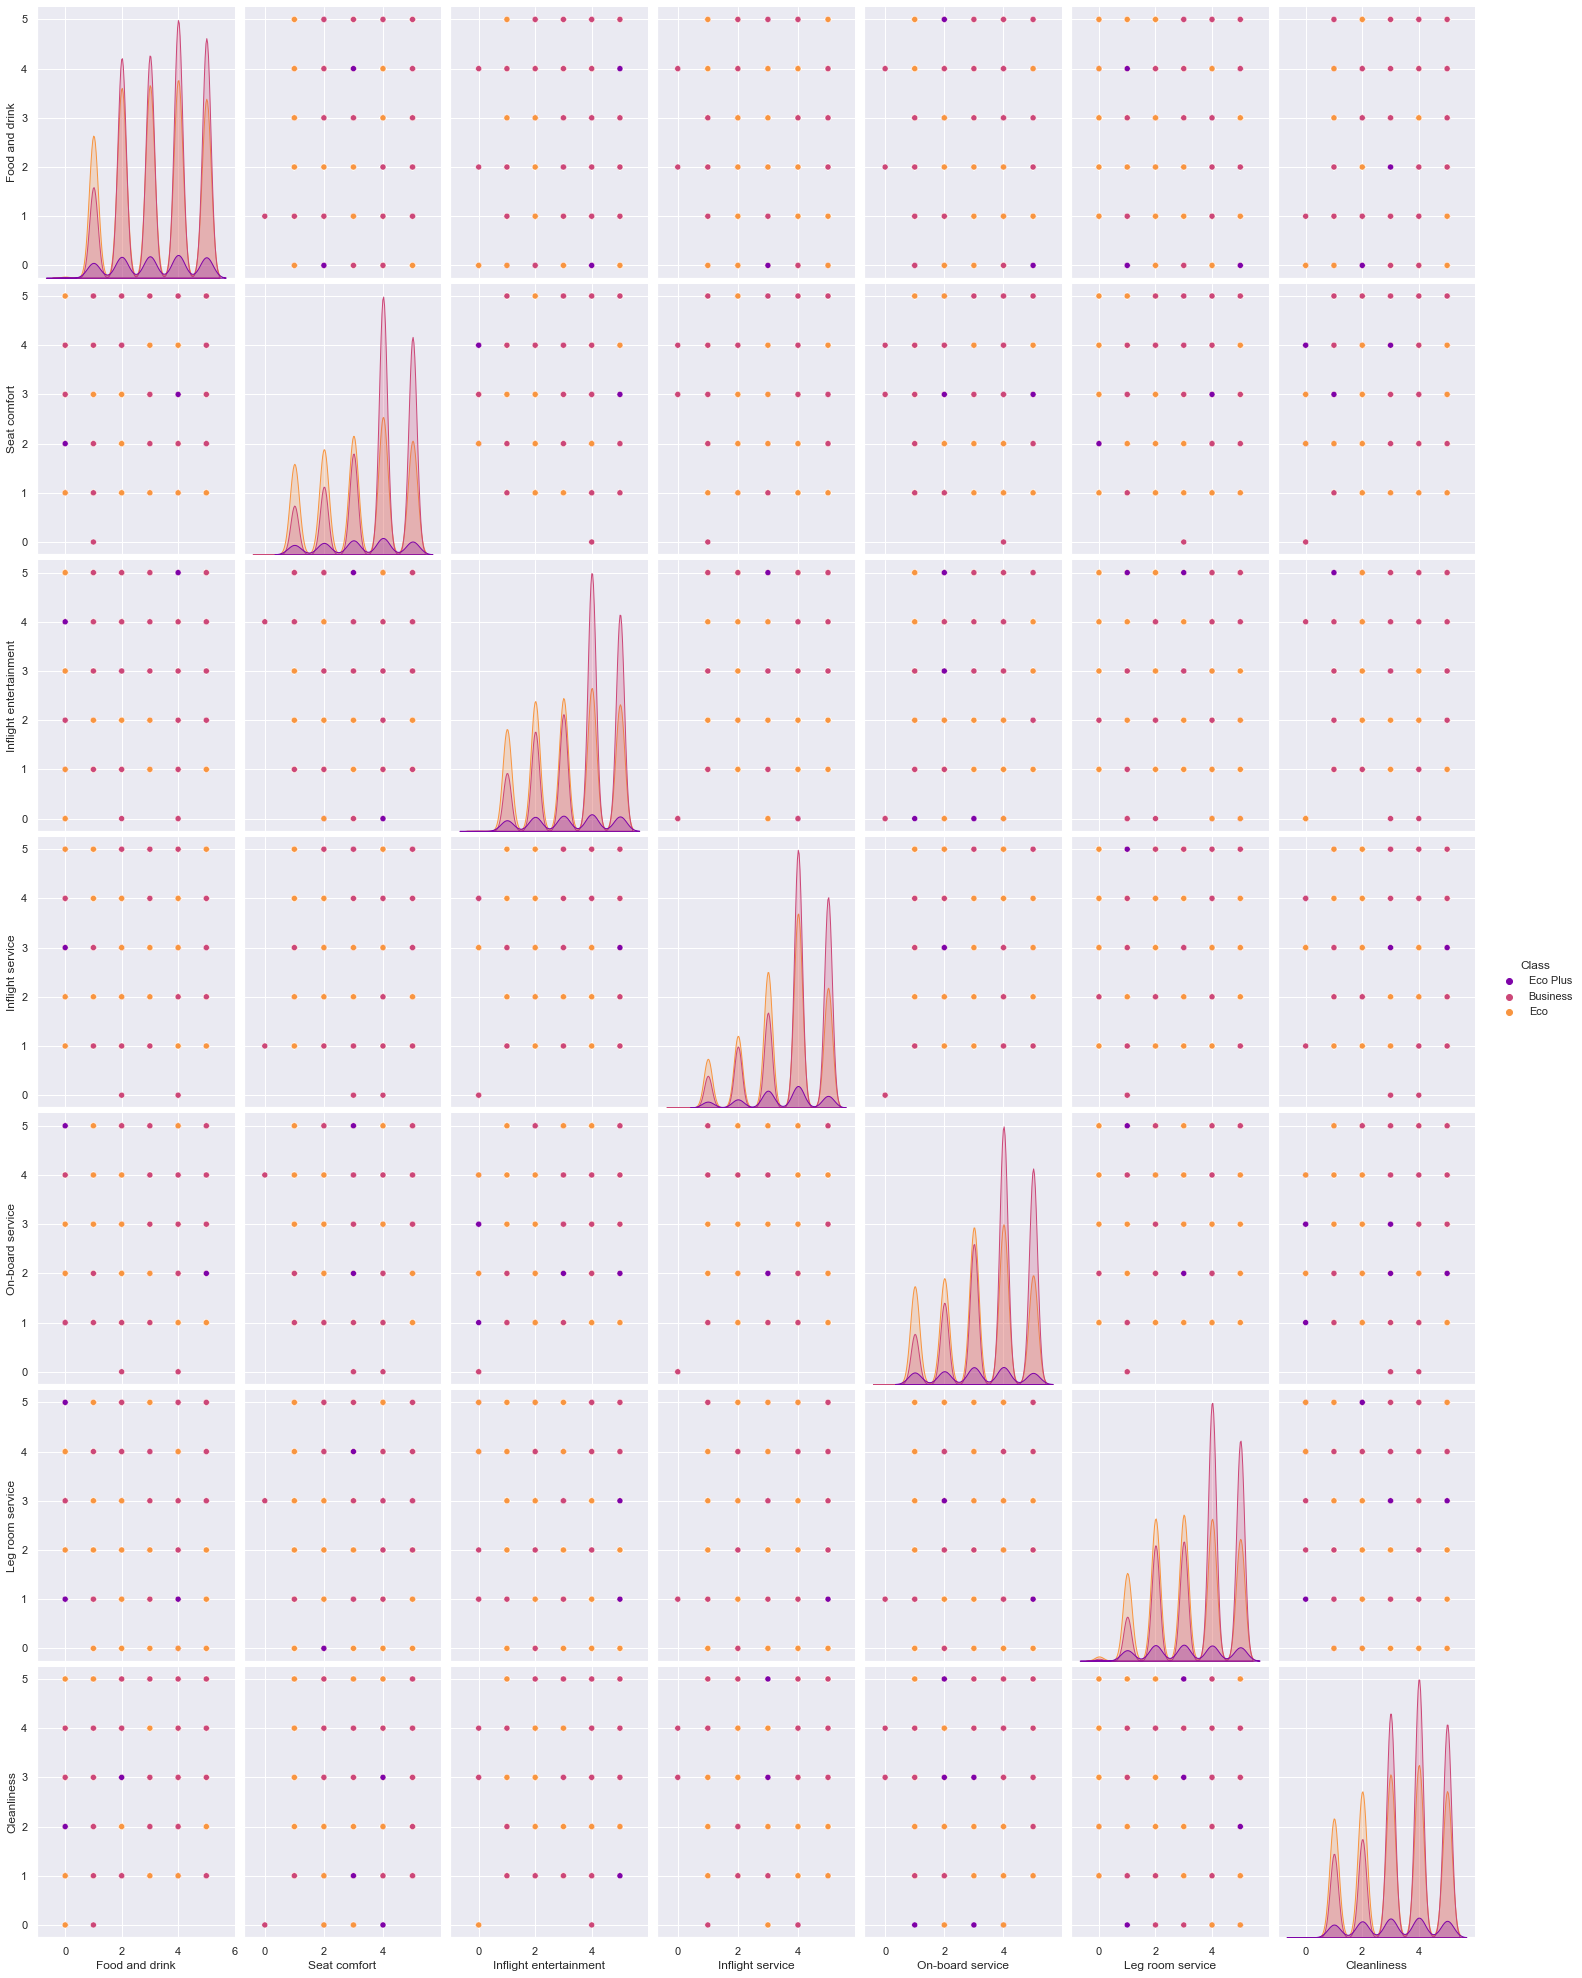

In [48]:
sns.pairplot(train_df[survey_cols], height=4, aspect=0.75, hue='Class', palette='plasma')
plt.show()

Of course a lot of the distribution for the Business class has high ratings for these attributes. The Eco Plus class is fairly evenly distributed among the ratings scores.

Going back to the target of satisfaction, <b>are there differences among individuals in different age groups and seat classes and their level of satisfaction with their flight experience?</b>

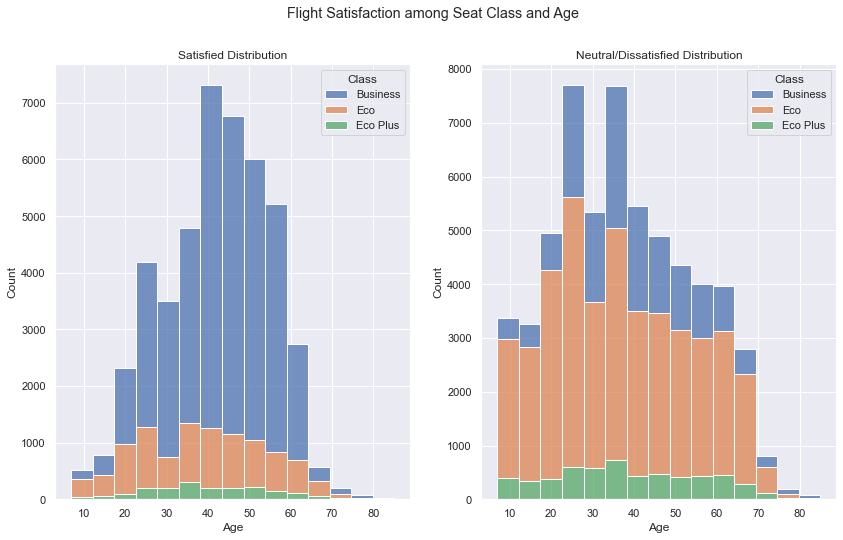

In [105]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))
sns.histplot(x='Age', hue='Class', multiple='stack', data=train_df[train_df['satisfaction']=='satisfied'], bins=15, ax=ax1, hue_order=['Business', 'Eco', 'Eco Plus'])
sns.histplot(x='Age', hue='Class', multiple='stack', data=train_df[train_df['satisfaction']=='neutral or dissatisfied'], bins=15, ax=ax2, hue_order=['Business', 'Eco', 'Eco Plus'])
plt.suptitle('Flight Satisfaction among Seat Class and Age')
ax1.set_title('Satisfied Distribution')
ax2.set_title('Neutral/Dissatisfied Distribution')
plt.show()

Intuitively, more customers are dissatisfied with standard Econ seats than they are with Business class seats. 

<b>Do customers find their arrival and departure times different depending on their reason for travel?</b>

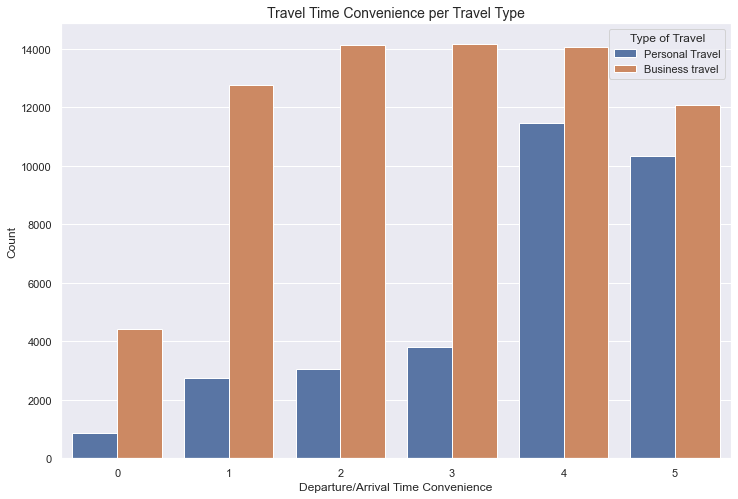

In [64]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="Departure/Arrival time convenient", hue="Type of Travel", data=train_df)
plt.title('Travel Time Convenience per Travel Type', fontsize=14)
plt.xlabel('Departure/Arrival Time Convenience')
plt.ylabel('Count')
plt.show()

There are much more lower ratings for records that are traveling by Business. There aren't as many lower ratings for those doing personal travel. <b>Is flight time influencing this?</b>

<b>Are passengers more likely to be dissatisfied if their is delayed with a longer flight time?</b>

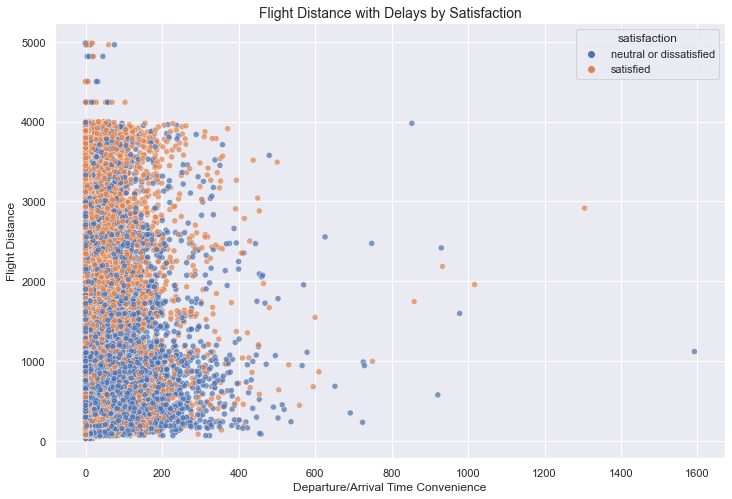

In [82]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x="Departure Delay in Minutes", y='Flight Distance', hue="satisfaction", alpha=0.7, data=train_df)
plt.title('Flight Distance with Delays by Satisfaction', fontsize=14)
plt.xlabel('Departure/Arrival Time Convenience')
plt.show()

It would appear that the longer the flight, the less likely passengers are willing to be dissatisfied with a flight. <b>At longer flight distances, are passengers willing to rate general inflight service higher?</b>

<Figure size 864x576 with 0 Axes>

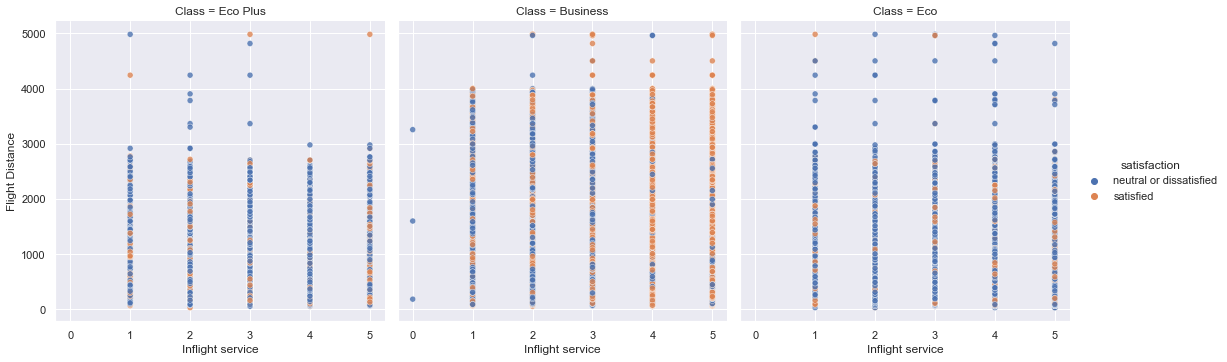

In [90]:
plt.figure(figsize=(12, 8))
ax = sns.relplot(x="Inflight service", y='Flight Distance', hue="satisfaction", col='Class', alpha=0.8, data=train_df,
                height=5, aspect=1.0)
plt.show()

Despite the flight duration, it seems that passengers are mmuch more likely to rate their experience as satisfied when flying Business and have generally high quality inflight service. <b>A focus may need to go on the standard classes to boost their level of satisfaction.</b>

Lastly, let's make a correlation plot of the variables, and identify any linking correlations among our attributes.

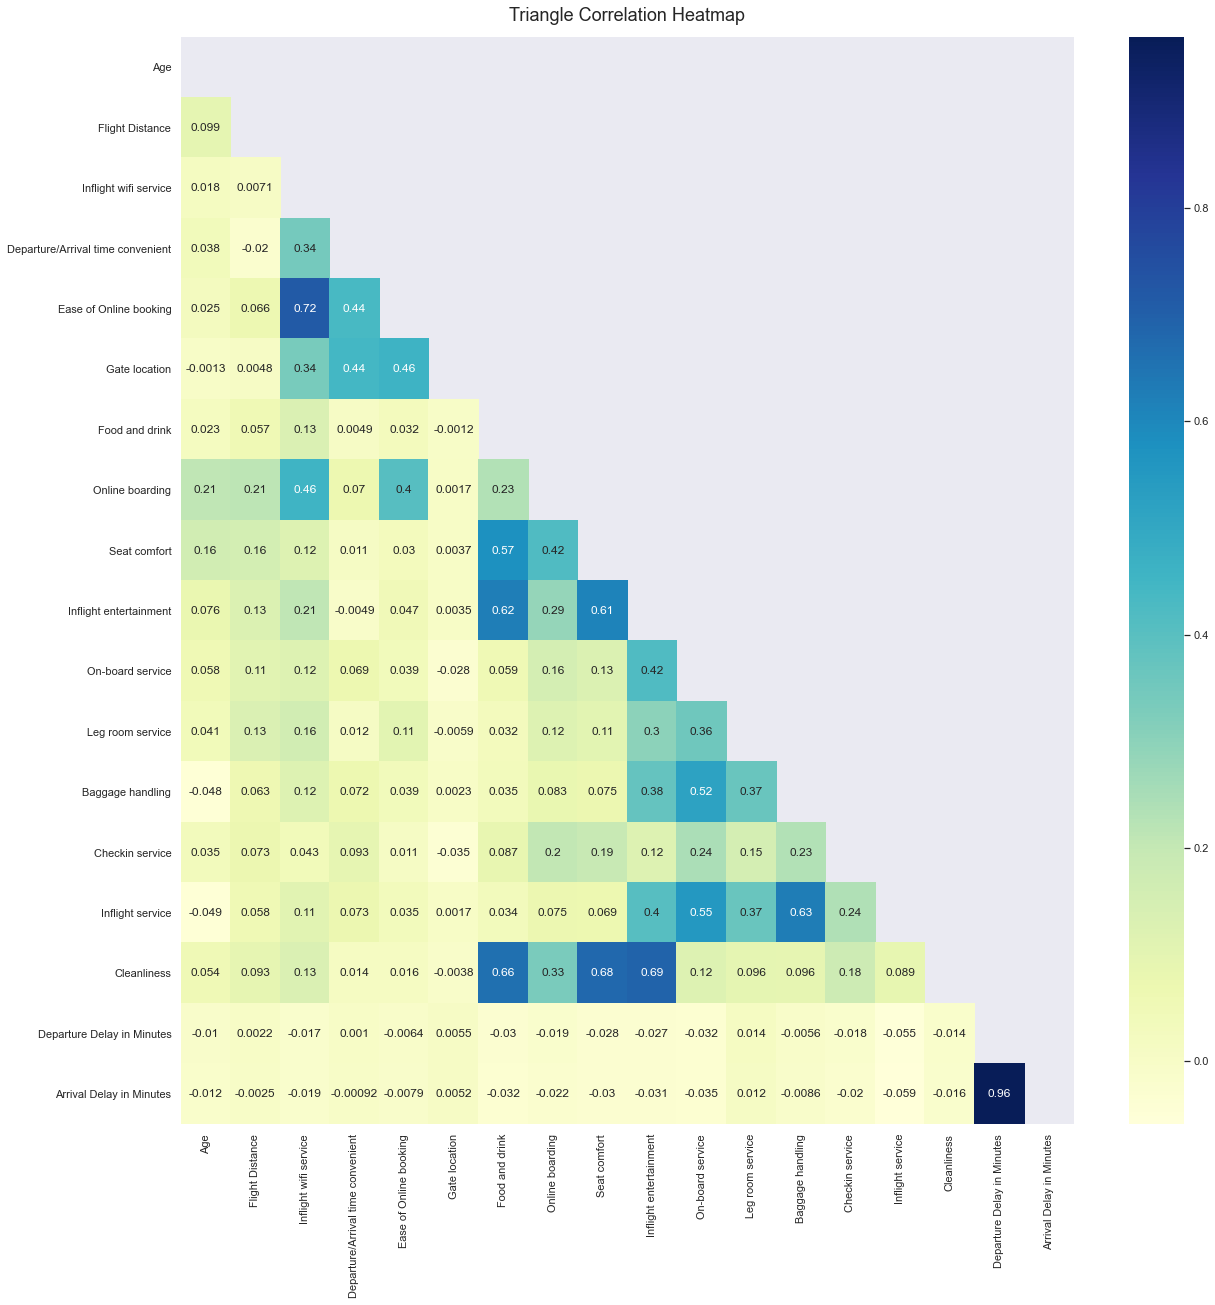

In [129]:
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(train_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(train_df.corr(), annot=True, mask=mask, cmap="YlGnBu")
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

Cleanliness seems to be decently correlated with seat comfort, food and drink, and inflight entertainment. These attributes likely may have all their own ranges of values that move together for each class of seat. Of course the flight delay times are also correlated.

## Closing Remarks:
* Despite the flight duration time, passengers who rated certain amenities on a flight high generally had a much higher likelihood of being satisfied with their flight experience.


* When flying for personal travel, <b>loyal</b> customers are more willing to buy upgraded/business class seats than those who are are labelled as disloyal. This also applies for business travel.


* Elderly, personal travel flying customers are more likely to rate their experience as satisfied. When flying for business, those who reserve business class seats are satisfied more than other seat types despite age (reinforced despite age and gender).


* When flying for personal reasons, elderly are more likely to buy upgraded seats as well. Also, despite their gender, elderly are willing to be more satisfied with their flight experience. 


* Business class seats have generally high amenity ratings than Eco and Eco Plus.


* Using distributions, the idea is reinforced that despite age, many of the satisfied ratings come from those sitting in the business class seats.


* The longer the flight duration, passengers seemed to be satisfied with their flight experience even if they had a small departure delay.


* Despite general Inflight service, the majorty of satisfied records belong to those in business class seats.

In conclusion, if this data were from a particular airline, I would recommend to continue to market to those loyal customers who clearly are willing to purchase upgraded seats. If flying for business, perhaps the airline could make contracts/deals to fly here since those flying are satisfied with their experience.

An airline could also market to elderly folks flying for vacations/personal reasons. Elderly folks are also more willing to upgrade their seats when flying for personal reasons.

Although business class seats intrinsically have higher ratings despite the category you observe, we may want to find other avenues to improve the flying experience for those flying in standard economy seats.



In [136]:
train_df.to_csv("train_df_cleaned.csv")
test_df.to_csv("test_df_cleaned.csv")